In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import cv2

print("NumPy version:", np.__version__)
print("OpenCV version:", cv2.__version__)


NumPy version: 2.1.3
OpenCV version: 4.10.0


In [7]:
img=cv2.imread('./test/download (3).jpg')
print(img.size)
print(img.shape)

151353
(251, 201, 3)


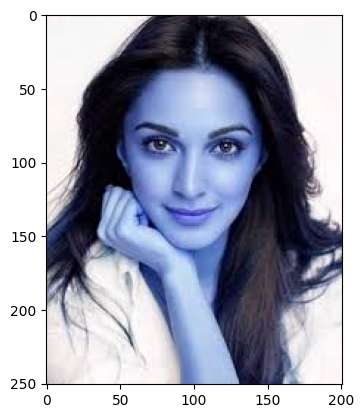

In [8]:
plt.imshow(img)

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

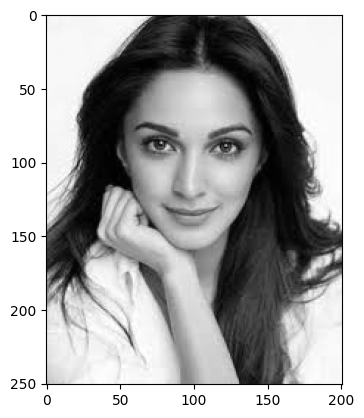

In [13]:
plt.imshow(gray, cmap='gray')

In [11]:
gray

array([[244, 244, 244, ..., 245, 245, 244],
       [244, 244, 244, ..., 245, 245, 244],
       [244, 244, 244, ..., 245, 245, 244],
       ...,
       [182, 193, 206, ..., 248, 248, 248],
       [185, 190, 203, ..., 248, 248, 248],
       [189, 185, 198, ..., 248, 248, 248]], dtype=uint8)

In [12]:
img

array([[[249, 243, 244],
        [249, 243, 244],
        [249, 243, 244],
        ...,
        [247, 245, 245],
        [247, 245, 245],
        [246, 244, 244]],

       [[249, 243, 244],
        [249, 243, 244],
        [249, 243, 244],
        ...,
        [247, 245, 245],
        [247, 245, 245],
        [246, 244, 244]],

       [[249, 243, 244],
        [249, 243, 244],
        [249, 243, 244],
        ...,
        [247, 245, 245],
        [247, 245, 245],
        [246, 244, 244]],

       ...,

       [[189, 179, 185],
        [200, 190, 196],
        [213, 203, 209],
        ...,
        [253, 247, 248],
        [253, 247, 248],
        [253, 247, 248]],

       [[192, 181, 189],
        [197, 187, 193],
        [210, 200, 206],
        ...,
        [253, 247, 248],
        [253, 247, 248],
        [253, 247, 248]],

       [[196, 185, 195],
        [192, 181, 189],
        [205, 194, 202],
        ...,
        [253, 247, 248],
        [253, 247, 248],
        [253, 247, 248]]

In [14]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[ 42,  46, 114, 114]], dtype=int32)

In [16]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(42), np.int32(46), np.int32(114), np.int32(114))

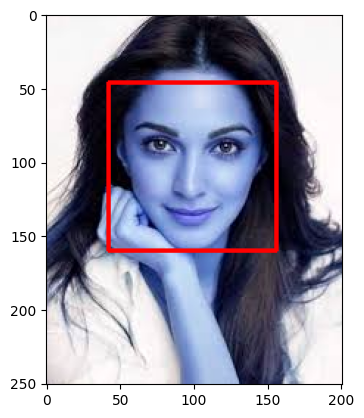

In [17]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

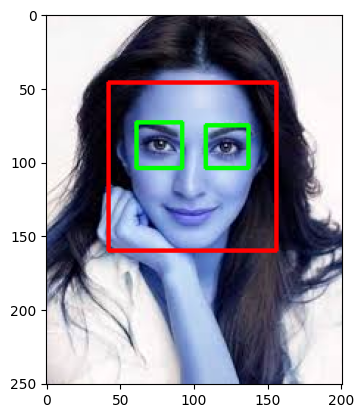

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')

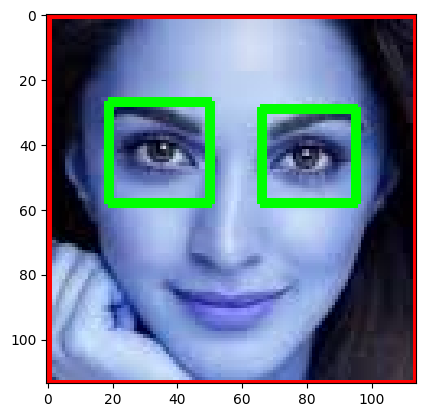

In [21]:
plt.imshow(roi_color, cmap='gray')

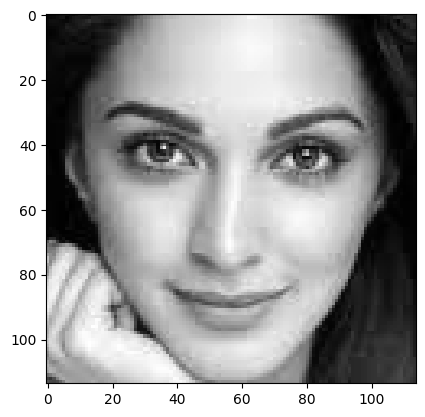

In [23]:
plt.imshow(roi_gray, cmap='gray')

In [24]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

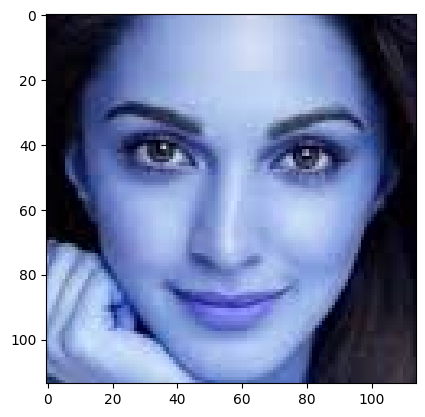

In [25]:
cropped=get_cropped_image_if_2_eyes('./test/download (3).jpg')
plt.imshow(cropped)

In [33]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['./dataset/janhvi kapoor',
 './dataset/kiara advani',
 './dataset/rahul gandhi',
 './dataset/salman khan',
 './dataset/virat kohli']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [37]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

janhvi kapoor
Generating cropped images in folder:  ./dataset/cropped/janhvi kapoor
kiara advani
Generating cropped images in folder:  ./dataset/cropped/kiara advani
rahul gandhi
Generating cropped images in folder:  ./dataset/cropped/rahul gandhi
salman khan
Generating cropped images in folder:  ./dataset/cropped/salman khan
virat kohli
Generating cropped images in folder:  ./dataset/cropped/virat kohli


In [38]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

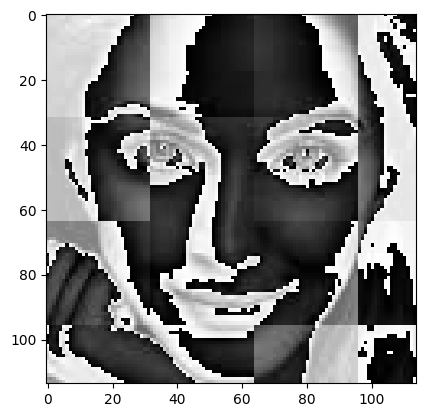

In [40]:
im_har = w2d(cropped,'db1',5)
plt.imshow(im_har, cmap='gray')

In [41]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'janhvi kapoor': ['./dataset/cropped/janhvi kapoor\\janhvi kapoor1.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor10.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor11.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor12.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor13.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor14.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor15.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor16.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor17.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor18.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor19.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor2.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor20.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor21.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor22.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor23.png',
  './dataset/cropped/janhvi kapoor\\janhvi kapoor24.png',

In [42]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'janhvi kapoor': 0,
 'kiara advani': 1,
 'rahul gandhi': 2,
 'salman khan': 3,
 'virat kohli': 4}

In [43]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [54]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(150, 4096)

In [55]:
len(y)

150

In [62]:
x=X

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [83]:
xtr,xt,ytr,yt=train_test_split(x,y,random_state=5)

In [84]:
print(type(x), type(y))
print(x.shape if hasattr(x, 'shape') else len(x))
print(y.shape if hasattr(y, 'shape') else len(y))


<class 'numpy.ndarray'> <class 'list'>
(150, 4096)
150


In [85]:
x.shape

(150, 4096)

In [86]:
len(xtr)

112

In [87]:
len(xt)

38

In [88]:
pipe=Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel='rbf', C=10))])
pipe.fit(xtr,ytr)
pipe.score(xt,yt)

0.868421052631579

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn import svm

In [91]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [93]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(xtr, ytr)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\D\Data Science\ML project 2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\D\Data Science\ML project 2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\D\Data Science\ML project 2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\D\Data Science\ML project 2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWar

,model,best_score,best_params
0,svm,0.856522,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.642688,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.865217,{'logisticregression__C': 1}


In [94]:
best_estimators['svm'].score(xt,yt)

0.9210526315789473

In [95]:
best_estimators['logistic_regression'].score(xt,yt)

0.8421052631578947

In [98]:
model=best_estimators['svm']

In [99]:
model.score(xt,yt)

0.9210526315789473

In [100]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(model, 'saved_model.pkl') 

['saved_model.pkl']

In [101]:
class_dict

{'janhvi kapoor': 0,
 'kiara advani': 1,
 'rahul gandhi': 2,
 'salman khan': 3,
 'virat kohli': 4}

In [102]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [104]:
len(xt[0])

4096